In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv("../Output/Data/processed_data.csv")
raw_df.head(1)
raw_df['Price'] = (raw_df['Price'] / 25500).astype(int) # chuyển sang đô la
raw_df = raw_df.drop(columns=['CPU Name','GPU Name','Storage Type'])
raw_df = raw_df.sample(frac=1,random_state=42).reset_index(drop=True)
raw_df

,Price,CPU Lithography,CPU Core,CPU Thread,CPU Cache,CPU Base Clock,CPU Max Clock,CPU Intel,CPU Series,RAM,...,GPU Onboard,GPU AMD,GPU NVIDIA,Display Type,Display Size,Display Frequency,OS,Warrant,Display Width,Display Height
0,881,7,24.0,32.0,36,1.5,5.2,1,9,8,...,1,0,0,0,22.0,60,11,24.0,1920,1080
1,666,7,10.0,12.0,12,4.6,4.6,1,5,8,...,0,1,0,1,14.0,60,11,24.0,1920,1080
2,823,7,10.0,16.0,24,4.7,4.7,1,7,32,...,1,0,0,1,15.0,144,11,12.0,1920,1080
3,2587,7,24.0,32.0,36,1.6,5.8,1,9,32,...,0,0,1,1,16.0,165,11,24.0,3200,2000
4,756,7,10.0,12.0,12,4.6,4.6,1,5,16,...,1,0,0,1,15.0,60,11,12.0,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2039,7,24.0,32.0,36,1.5,5.2,1,9,32,...,0,0,1,1,16.0,165,11,36.0,2560,1600
902,901,7,16.0,24.0,30,1.5,5.1,1,7,16,...,1,0,0,0,14.0,60,11,36.0,1920,1200
903,4705,7,24.0,32.0,36,1.5,5.4,1,9,32,...,0,0,1,1,29.0,60,11,24.0,2560,1600
904,1489,7,14.0,20.0,24,4.7,4.7,1,5,32,...,0,0,1,1,16.0,165,11,12.0,2560,1600


In [3]:
raw_df.shape

(906, 24)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              906 non-null    int32  
 1   CPU Lithography    906 non-null    int64  
 2   CPU Core           906 non-null    float64
 3   CPU Thread         906 non-null    float64
 4   CPU Cache          906 non-null    int64  
 5   CPU Base Clock     906 non-null    float64
 6   CPU Max Clock      906 non-null    float64
 7   CPU Intel          906 non-null    int64  
 8   CPU Series         906 non-null    int64  
 9   RAM                906 non-null    int64  
 10  Memory Type        906 non-null    int64  
 11  Max DDR Support    906 non-null    float64
 12  Storage            906 non-null    int64  
 13  GPU VRAM           906 non-null    float64
 14  GPU Onboard        906 non-null    int64  
 15  GPU AMD            906 non-null    int64  
 16  GPU NVIDIA         906 non

In [5]:
raw_df.isnull().sum()

Price                0
CPU Lithography      0
CPU Core             0
CPU Thread           0
CPU Cache            0
CPU Base Clock       0
CPU Max Clock        0
CPU Intel            0
CPU Series           0
RAM                  0
Memory Type          0
Max DDR Support      0
Storage              0
GPU VRAM             0
GPU Onboard          0
GPU AMD              0
GPU NVIDIA           0
Display Type         0
Display Size         0
Display Frequency    0
OS                   0
Warrant              0
Display Width        0
Display Height       0
dtype: int64

### Price and Display Size

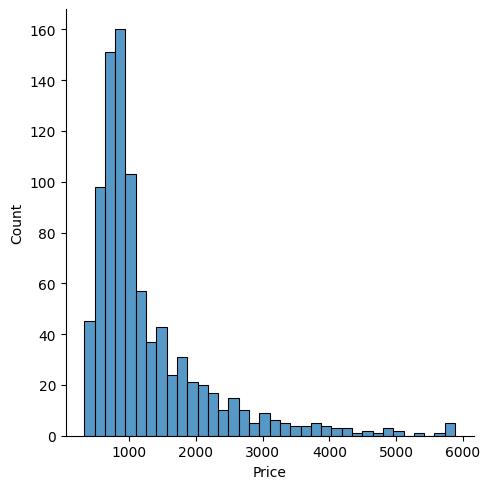

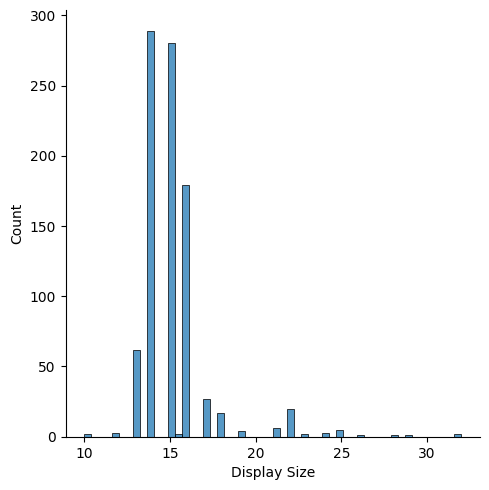

In [6]:
sns.displot(raw_df['Price'])
sns.displot(raw_df['Display Size'])

<Axes: xlabel='Display Size', ylabel='Price'>

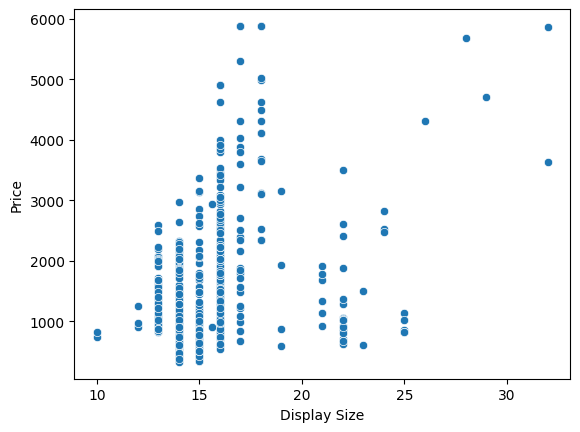

In [7]:
sns.scatterplot(x=raw_df['Display Size'],y=raw_df['Price'])

### Price and RAM

<Axes: xlabel='RAM'>

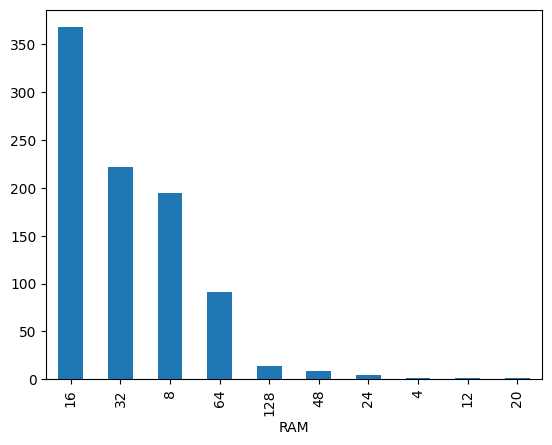

In [9]:
raw_df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

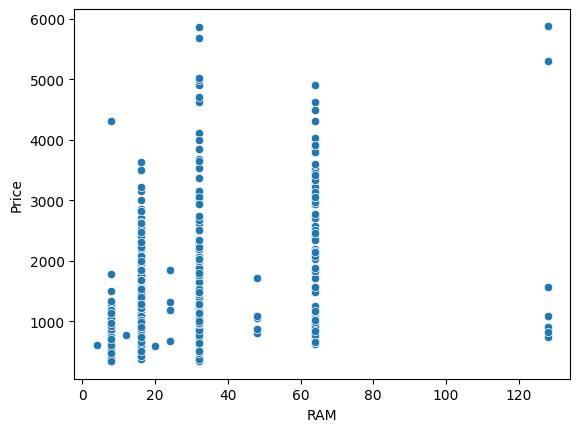

In [17]:
sns.scatterplot(x=raw_df['RAM'],y=raw_df['Price'])

### Price and Storage

<Axes: xlabel='Storage'>

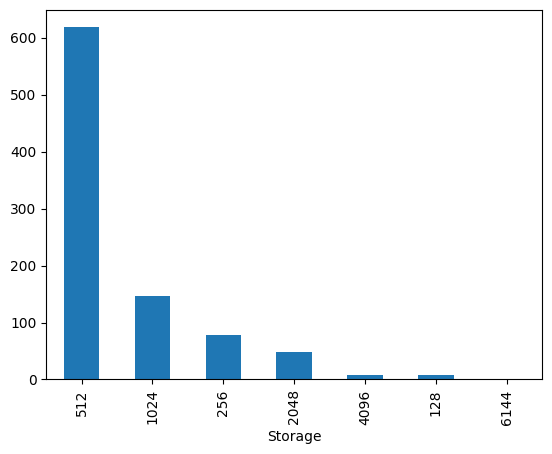

In [10]:
raw_df['Storage'].value_counts().plot(kind='bar')

<Axes: xlabel='Storage', ylabel='Price'>

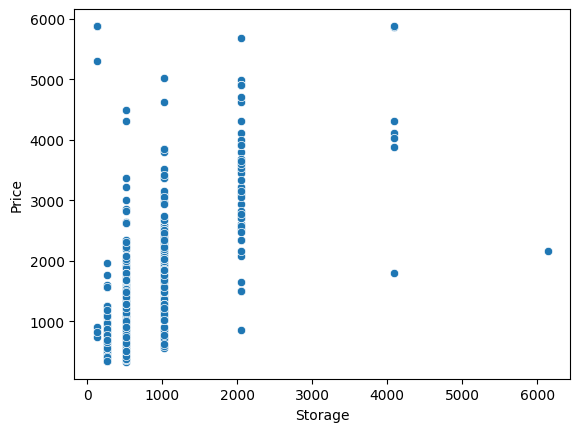

In [11]:
sns.scatterplot(x=raw_df['Storage'],y=raw_df['Price'])

### Price and Display Frequency

<Axes: xlabel='Display Frequency'>

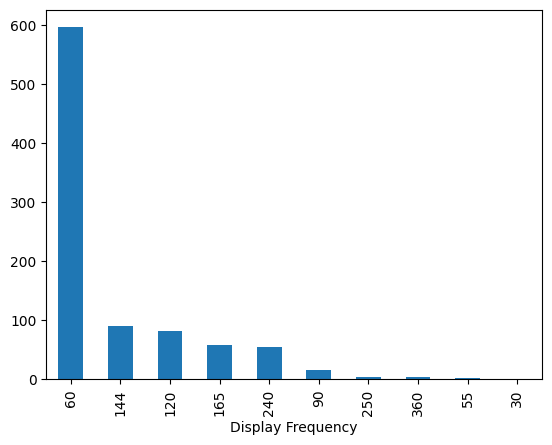

In [12]:
raw_df['Display Frequency'].value_counts().plot(kind='bar')

<Axes: xlabel='Display Frequency', ylabel='Price'>

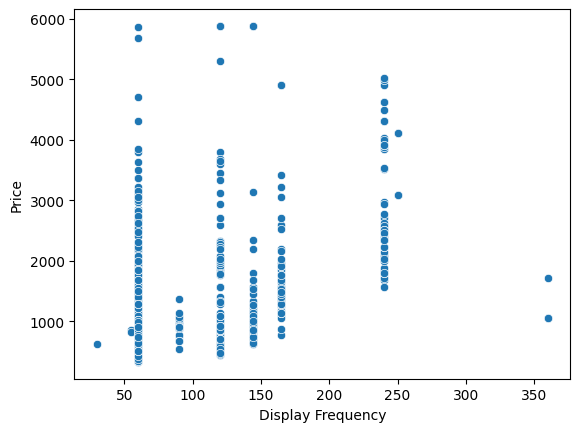

In [13]:
sns.scatterplot(x=raw_df['Display Frequency'],y=raw_df['Price'])

### Price and CPU Series

<Axes: xlabel='CPU Series', ylabel='Price'>

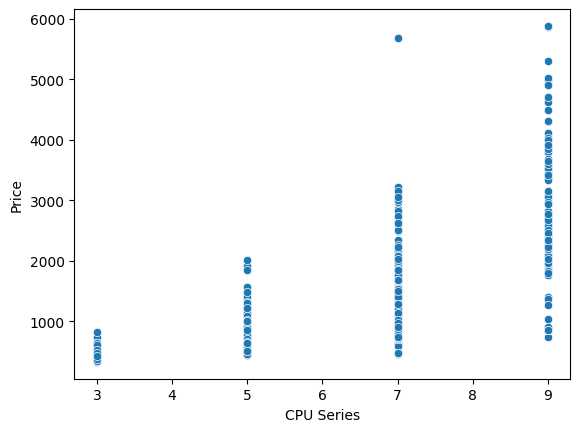

In [14]:
sns.scatterplot(x=raw_df['CPU Series'],y=raw_df['Price'])

### Price and GPU

In [20]:
def determine_gpu(row):
    if row['GPU AMD'] == 1:
        return 'AMD'
    elif row['GPU NVIDIA'] == 1:
        return 'NVIDIA'
    elif row['GPU Onboard'] == 1:
        return 'Onboard'
    else:
        return 'None'

# Áp dụng hàm để tạo cột mới
raw_df['GPU Type'] = raw_df.apply(determine_gpu, axis=1)
raw_df

,Price,CPU Lithography,CPU Core,CPU Thread,CPU Cache,CPU Base Clock,CPU Max Clock,CPU Intel,CPU Series,RAM,...,GPU AMD,GPU NVIDIA,Display Type,Display Size,Display Frequency,OS,Warrant,Display Width,Display Height,GPU Type
0,881,7,24.0,32.0,36,1.5,5.2,1,9,8,...,0,0,0,22.0,60,11,24.0,1920,1080,Onboard
1,666,7,10.0,12.0,12,4.6,4.6,1,5,8,...,1,0,1,14.0,60,11,24.0,1920,1080,AMD
2,823,7,10.0,16.0,24,4.7,4.7,1,7,32,...,0,0,1,15.0,144,11,12.0,1920,1080,Onboard
3,2587,7,24.0,32.0,36,1.6,5.8,1,9,32,...,0,1,1,16.0,165,11,24.0,3200,2000,NVIDIA
4,756,7,10.0,12.0,12,4.6,4.6,1,5,16,...,0,0,1,15.0,60,11,12.0,1920,1080,Onboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2039,7,24.0,32.0,36,1.5,5.2,1,9,32,...,0,1,1,16.0,165,11,36.0,2560,1600,NVIDIA
902,901,7,16.0,24.0,30,1.5,5.1,1,7,16,...,0,0,0,14.0,60,11,36.0,1920,1200,Onboard
903,4705,7,24.0,32.0,36,1.5,5.4,1,9,32,...,0,1,1,29.0,60,11,24.0,2560,1600,NVIDIA
904,1489,7,14.0,20.0,24,4.7,4.7,1,5,32,...,0,1,1,16.0,165,11,12.0,2560,1600,NVIDIA


<Axes: xlabel='GPU Type'>

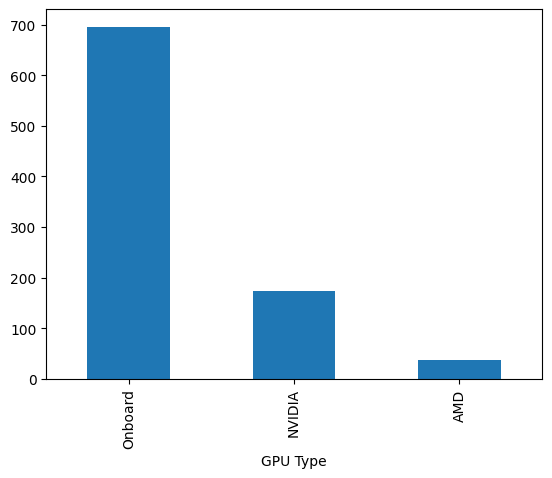

In [23]:
raw_df['GPU Type'].value_counts().plot(kind='bar')

<Axes: xlabel='GPU Type', ylabel='Price'>

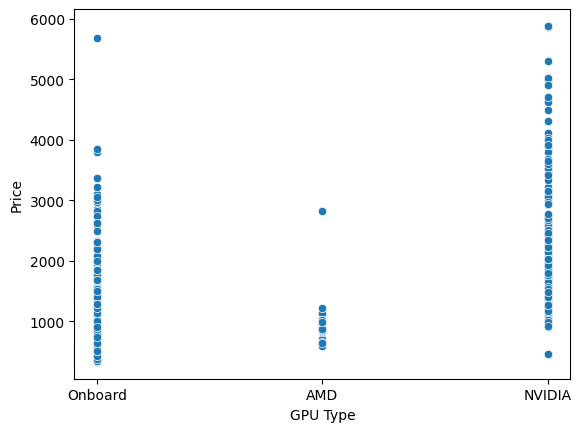

In [22]:
sns.scatterplot(x=raw_df['GPU Type'],y=raw_df['Price'])